In [3]:
#IMPORTING LIABRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
#DATA PREPERATION
dp=pd.read_csv(r'D:\DataSets/avocado.csv')

# EXPLORING THE DATA

In [6]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
dp.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# CHECKING MISSING VALUES

In [8]:
dp.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# DROPPING UNNECESSARY COLUMNS

In [10]:
dp=dp.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [12]:
dp.head() #now here we can seee in dataset the unnecessary columns are deleted

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# ANSWERING QUESTIONS

In [53]:
def get_average(dp,column):
    """"
    Description: This function to return the average value of thr column
    
    Arguments:
    dp: the DataFrame.
    column: the selected column.
    
    Returns:
    column's average
    """
    
    return sum(dp[column])/len(dp)


In [54]:
def get_average_between_two_columns(dp,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(dp[column1].unique())
    average=[]

    for i in List:
        x=dp[dp[column1]==i]
        column1_average= get_average(x,column2)
        average.append(column1_average)

    dp_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=dp_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=dp_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data
        

In [55]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

# Which region are the lowest and highest prices of Avocado?

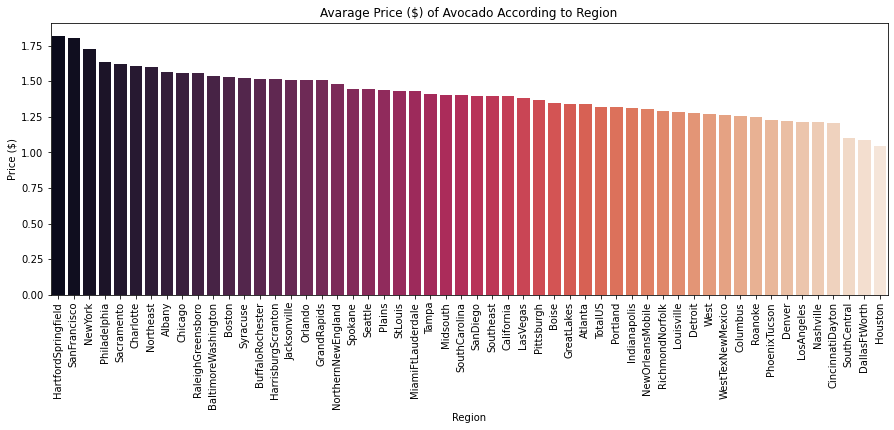

In [56]:
data1 = get_average_between_two_columns(dp,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [58]:
print(data1['column1'].iloc[-1], "is the region producing avacado with the lowest price.")

Houston is the region producing avacado with the lowest price.


# What is the highest region of avocado production?

Checking if there are outlier values or not.

Text(0.5, 1.0, 'Figure: Boxplot representing outlier Columns')

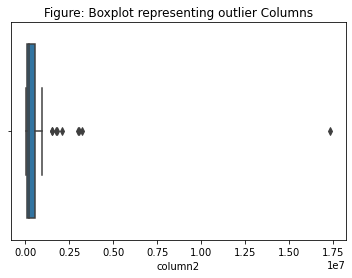

In [59]:
data2=get_average_between_two_columns(dp,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot representing outlier Columns")

In [60]:
outlier_region=data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [61]:
outlier_region.index
data2=data2.drop(outlier_region.index,axis=0)#Removing the Outlier Value

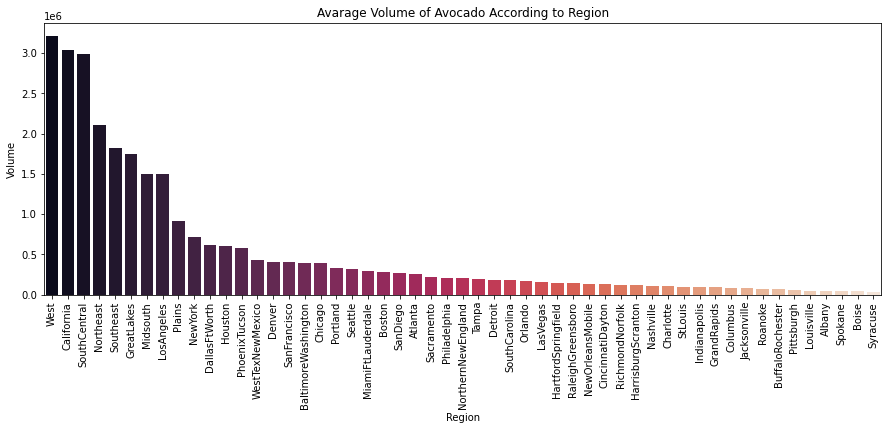

In [62]:
plot(data2,'Region','Volume')

# What is the average avocado prices in each year?

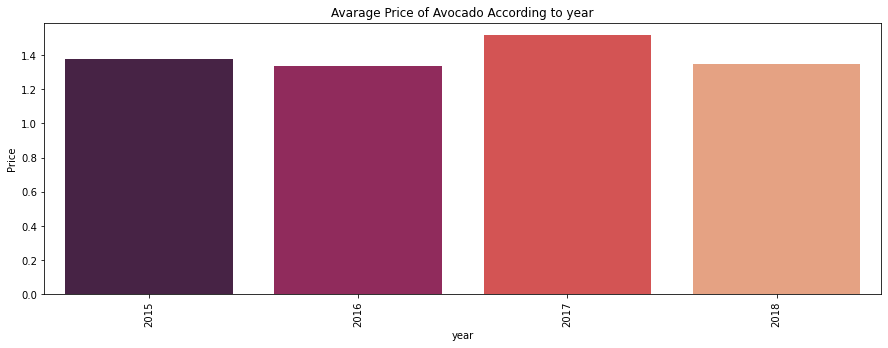

In [63]:
data3=get_average_between_two_columns(dp,'year','AveragePrice')
plot(data3,'year','Price')

# What is the average avocado volume in each year?

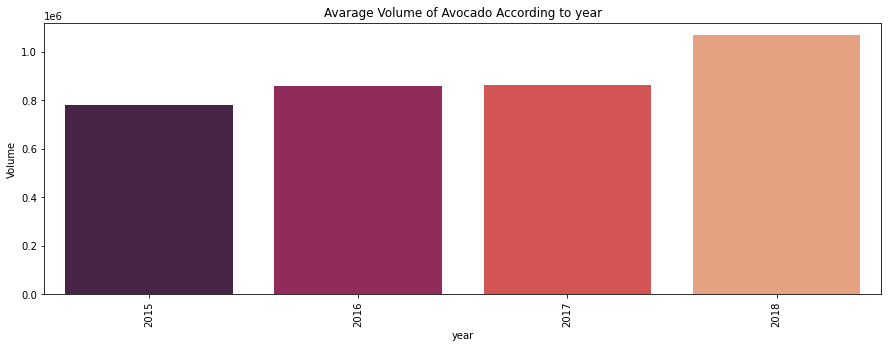

In [64]:
data4=get_average_between_two_columns(dp,'year','Total Volume')
plot(data4,'year','Volume')

# DATA MODELLING

changing some column types to categories

In [66]:
dp['region']=dp['region'].astype('category')
dp['region']=dp['region'].cat.codes


dp['type']=dp['type'].astype('category')
dp['type']=dp['type'].cat.codes

In [67]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [68]:
dp.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [69]:
#Splitting the dataset into X & Y
X=dp.drop(['AveragePrice'],axis=1)
y=dp['AveragePrice']

In [75]:
#Splitting The dataset into Training & Testing Phase
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [76]:
X_train.shape

(14599, 8)

In [77]:
X_test.shape

(3650, 8)

In [79]:
#Building & Fiting the model into LinearRegression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
#Predicting the accuracy for testing phase
from sklearn.metrics import r2_score
test_pred=model.predict(X_test)
test_score=r2_score(y_test,test_pred)
print(test_score*100)

39.89230268071401


In [83]:
#Predicting the accuracy for training phase
train_pred=model.predict(X_train)
train_score=r2_score(y_train,train_pred)
print(train_score*100)

39.24925526949343
